In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

## SEIR Model

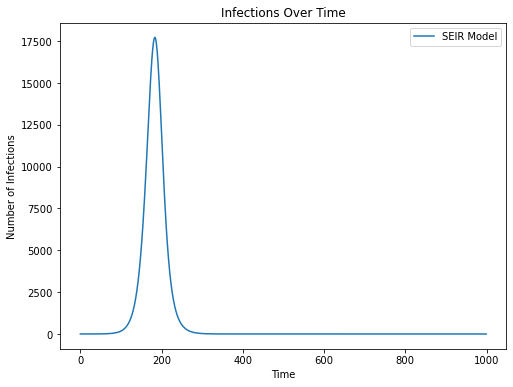

In [4]:
# Parameters
beta = 0.3  # Infection rate
alpha = 1/10  # Incubation rate
gamma = 1/10  # Recovery rate
p = 3/100  # Chance of infection per interaction
N = 1000000  # Total population
K = 10  # Contact rate
I0 = 1  # Initial number of infected individuals
E0 = 0  # Initial number of exposed individuals
R0 = 0  # Initial number of recovered individuals
S0 = N - I0 - E0 - R0  # Initial number of susceptible individuals

# Define the SEIR model
def seir_Model(t, y): # t = time , y = list of initial values
    S, E, I, R = y
    i = (p*((K*I)/N))*S # Probability of an individual coming into contact with someone who is infected
    i_Span.append(i)
    #print (i)
    next_S = S - i # Change in Susceptible individuals
    next_E = E + i - (alpha * E) # Change in Exposed individuals
    next_I = I +  (alpha * E) - (gamma * I) # Change in Infected individuals
    next_R = R + gamma * I # Change in Recovered individuals
    
    return [next_S, next_E, next_I, next_R]

# Time span
t_Span = range(0, 1000)

# Initial conditions
y0 = [S0, E0, I0, R0]
y = [y0]
i_Span = []
b = K  # 
x = 1/5000  # probability of infection per day
f = 1/100  #  rate at which low risk of infection causes individuals to cease responding.

# Solve the SEIR model
for t in t_Span:
    y.append(seir_Model(t, y[-1]))

plt.figure(figsize=(8, 6))
plt.plot(t_Span, i_Span, label='SEIR Model')
plt.xlabel('Time')
plt.ylabel('Number of Infections')
plt.title('Infections Over Time')
plt.legend()
plt.show()

## ASEIR Model

In [ ]:
# constant values
N = 1000000                            # Total population
K = 10                                 # Contact Rate
alpha = 1/10                           # Incubation rate
beta = 0.3                             # Infection rate
gamma = 1/10                           # Recovery rate
p = 3/100                              # Chance of infection per interaction
b = K                                  # ???
L = 20                                 # Lag from contracting to showing symptoms
x = 1/5000                             # Probability of infection per day
f = 1/100                              # Rate at which low risk of infection causes individuals to cease responding.

times = np.arange(1, 2001)             # Number of "days" simulated

# Set aseir function to loop through times 
def aseir():
    # Initial values for ASEIR
    A = 0  
    S = N  
    E = 0  
    I = 0  
    R = 0  
    I_lag = np.zeros(len(times) + L + 1)  # list of i values at each time t
    p_lag = np.zeros(len(times) + L + 1)  # list of p values at each time t
    results = []  
    
    for t in times:
        i = (1 - (A/N)*(p*K*I_lag[t])/(x*N + p*K*I_lag[t])) * p * K * S * I / N  
        S = S - i  # Change in Susceptible individuals
        if (t == 1):
            E = 1
        else:
            E = E + i - alpha * E  # Change in Exposed individuals
        I = I + alpha * E - gamma * I  # Change in Infected individuals
        R = R + gamma * I  # Change in Recovered individuals
        A = A + b * (N - A) * I_lag[t] / N - A * f * (1 - b * I_lag[t] / N)
        I_lag[t + L] = I  # Update lagged values
        
        results.append([t, A, S, E, I, R, i])

    return results
    
    
data = aseir()
columns = ["t", "A", "S", "E", "I", "R", "i"]
df = pd.DataFrame(data, columns=columns)
df.head(50)

In [ ]:
# def __init__(self, name, p, i, i_list, E, E_list, I, I_list)
origin = Mutation.add_mutation("Origin", 0.03, [0], 0, [0], 0, [0])
#print(origin.chance)
mutations = [origin]
mutations[0].p

In [ ]:
###### Code for initial mutation #############
# constant values
N = 1000000                            # Total population
K = 10                                 # Contact Rate
alpha = 0.1                            # Incubation rate
beta = 0.3                             # Infection rate
gamma = 0.1                            # Recovery rate
p = 0.03                               # Chance of infection per interaction
#m = ??                                 # Chance of mutation 
b = K                                  # ???
L = 20                                 # Lag from contracting to showing symptoms
x = 0.0002                             # Probability of infection per day
f = 0.01                               # Rate at which low risk of infection causes individuals to cease responding.

times = np.arange(1, 2001)             # Number of "days" simulated

#mutations_cap = 2
#origin = Mutation.add_mutation("Origin", 0.03, "TypeA")
#variant = Mutation.add_mutation("Variant", 0.07, "TypeB")

mutations = [origin]

# Set aseir function to loop through times 
def aseir():
    # Initial values for ASEIR
    A = 0  
    S = N  
    E = 0  
    I = 0  
    R = 0  
    I_lag = np.zeros(len(times) + L + 1)  # list of i values at each time t
    results = []  
    
    for t in times:
        
        i = (1 - (A/N)*(p*K*I_lag[t])/(x*N + p*K*I_lag[t])) * p * K * S * I / N  
        S = S - i  # Change in Susceptible individuals
        if (t == 1):
            E = 1
        else:
            E = E + i - alpha * E  # Change in Exposed individuals
        I = I + alpha * E - gamma * I  # Change in Infected individuals
        R = R + gamma * I  # Change in Recovered individuals
        A = A + b * (N - A) * I_lag[t] / N - A * f * (1 - b * I_lag[t] / N)
        I_lag[t + L] = I  # Update lagged values
        
        results.append([t, A, S, E, I, R, i])

    return results
    
    
data = aseir()
columns = ["t", "A", "S", "E", "I", "R", "i"]
df = pd.DataFrame(data, columns=columns)

mut_data = {
    "i_list" : mutations[0].i_list,
    "E_list" : mutations[0].E_list,
    "I_list" : mutations[0].I_list
}
mut_df = pd.DataFrame(mut_data)
df = pd.concat([df, mut_df], axis=1)
df.head(50)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df['t'], df['i'], label='Model 1')
plt.xlabel('Time')
plt.ylabel('Number of Infections')
plt.title('Infections Over Time')
plt.legend()
plt.show()

In [ ]:
total = 0

# Generate a random number from the beta distribution
for test in range(0,100):
    total += np.random.beta(4, 2)
    
total = total / 100
print (total)

In [ ]:
###### Single Random Mutation ############

# constant values
N = 1000000                            # Total population
K = 10                                 # Contact Rate
alpha = 0.1                            # Incubation rate
beta = 0.3                             # Infection rate
gamma = 0.1                            # Recovery rate
p = 0.03                               # Chance of infection per interaction
#m = ??                                 # Chance of mutation 
b = K                                  # ???
L = 20                                 # Lag from contracting to showing symptoms
x = 0.0002                             # Probability of infection per day
f = 0.01                               # Rate at which low risk of infection causes individuals to cease responding.

times = np.arange(1, 2001)             # Number of "days" simulated

#mutations_cap = 2
origin = Mutation.add_mutation("Origin", 0.03, 0, [], 0, [], 0, [], 0)
#variant = Mutation.add_mutation("Variant", 0.07, "TypeB")

max_probability = 0.5  # maximum chance
base_probability = 0.05  # initial low chance
#fluctuation_range = 0.01  # random variable used to vary probability of any given mutation
#
## calculates the base probability with the fluctuation
#base_probability_with_fluctuation = base_probability + random.uniform(-fluctuation_range, fluctuation_range)

divisor = 2000    # increasing this value affects the average time between mutations
mutations = [origin]  # list of mutations that occured

# Set aseir function to loop through times 
def aseir():
    # Initial values for ASEIR
    A = 0  
    S = N  
    E = 0  
    I = 0  
    R = 0  
    I_lag = np.zeros(len(times) + L + 1)  # list of i values at each time t
    results = []  # list to store data from aseir model
    mutation_occurred = False  # flag used to track if mutation has occured (testing only)
    days_without_mutation = 0  # tracks the number of days without mutation
    
    for t in times:
        
        #####################
        # Change code to increase chance as time since last mutation increases
        #####################
        
        # calculates the probability with gradual increase based on number of days since last mutation
        probability = base_probability + min(days_without_mutation / divisor, 1) * (max_probability - base_probability)

        if not mutation_occurred and np.random.beta(4, 2) < probability:
            fill = [0] * t
            variant1 = Mutation.add_mutation("Variant1", 0.1, 0, fill, 0, fill, 1, fill, 0)
            mutations.append(variant1)
            mutation_occurred = True
            #print(t)
            #print(probability)
        else:
            days_without_mutation += 1 
        
        i = 0
        for m in mutations:
            m.i = (1 - (A/N)*(m.p*K*I_lag[t])/(x*N + m.p*K*I_lag[t])) * m.p * K * S * m.I / N
            m.i_list.append(m.i)
            i += m.i
        
        S = S - i  # change in Susceptible individuals
            
        E = 0
        if (t == 1):
            mutations[0].E = 1
            mutations[0].E_list.append(mutations[0].E)
            E = 1
        else:
            for m in mutations:
                m.E = m.E + m.i - alpha * m.E
                m.E_list.append(m.E)
                # add sum for total of E values in mutations
                E += m.E
        
        I = 0  # change in Infected individuals
        for m in mutations:
            m.I = m.I + alpha * m.E - gamma * m.I
            m.I_list.append(m.I)
            # add sum for total of I values in mutations
            I += m.I
        
        R = R + gamma * I  # change in Recovered individuals
        A = A + b * (N - A) * I_lag[t] / N - A * f * (1 - b * I_lag[t] / N)
        I_lag[t + L] = I  # update lagged values
        
        results.append([t, A, S, E, I, R, i, p])

    return results
    


data = aseir()
columns = ["t", "A", "S", "E", "I", "R", "i", "p"]
df = pd.DataFrame(data, columns=columns)
df.head(50)

plt.figure(figsize=(8, 6))
plt.plot(df['t'], df['i'], label='Model 1')
plt.xlabel('Time')
plt.ylabel('Number of Infections')
plt.title('Infections Over Time')
plt.legend()
plt.show()

In [ ]:
######## Test for random generation ###########

def reset_values():
    global N, K, alpha, beta, gamma, p, b, L, x, f, times, mutations, A, S, E, I, R, I_lag, results, mutation_occurred, days_without_mutation
    
    N = 1000000                            # Total population
    K = 10                                 # Contact Rate
    alpha = 0.1                            # Incubation rate
    beta = 0.3                             # Infection rate
    gamma = 0.1                            # Recovery rate
    p = 0.03                               # Chance of infection per interaction
    b = K                                  # ???
    L = 20                                 # Lag from contracting to showing symptoms
    x = 0.0002                             # Probability of infection per day
    f = 0.01                               # Rate at which low risk of infection causes individuals to cease responding.
    times = np.arange(1, 2001)             # Number of "days" simulated
    origin = Mutation.add_mutation("Origin", 0.03, 0, [], 0, [], 0, [], 0)
    max_probability = 0.5  # maximum chance
    base_probability = 0.05  # initial low chance
    divisor = 2000    # increasing this value affects the average time between mutations
    mutations = [origin]  # list of mutations that occurred
    A = 0  
    S = N  
    E = 0  
    I = 0  
    R = 0  
    I_lag = np.zeros(len(times) + L + 1)  # list of i values at each time t
    results = []  # list to store data from aseir model
    mutation_occurred = False  # flag used to track if mutation has occurred (testing only)
    days_without_mutation = 0  # tracks the number of days without mutation

plt.figure(figsize=(8, 6))
columns = ["t", "A", "S", "E", "I", "R", "i", "p"]
for test in range(1, 11):
    reset_values()
    model_name = "Model " + str(test)
    #print(model_name)
    data = aseir()
    df = pd.DataFrame(data, columns=columns)
    plt.plot(df['t'], df['i'], label=model_name)

plt.xlabel('Time')
plt.ylabel('Number of Infections')
plt.title('Infections Over Time')
plt.legend()
plt.show()
